In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../script/")
sys.path.insert(0, "../cluster/")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns
sns.set(color_codes=True)
from sklearn import linear_model
import numpy as np

ImportError: No module named seaborn

In [3]:
#sitelist = ["asp", "douban", "stackexchange", "tripadvisor","youtube","rottentomatoes"]
sitelist = ["rottentomatoes"]
feat_dict = {}
for site in sitelist:
    feat_dict[site] = []
    with open("./June29/feature/" + site + "/log_tf_idf.txt") as fin:
    #with open("./crawling/May1/feature/"+ site +"/log_tf_idf.txt") as fin:
        for line in fin:
            _, vector = line.strip().split(':')
            vector = [float(x) for x in vector.split()]
            feat_dict[site].append(vector)
    feat_dict[site] = np.asarray(feat_dict[site])

number of feats  359
0 0.204859555803
1 0.204859555803
2 0.204859555803
3 0.205674318778
4 0.194503980424
5 0.194503980424
30 0.153396245567
40 0.187668724518
112 0.120282755179
144 0.108990097586
190 0.101137909379
215 0.116813093942
273 0.170866526941
294 0.170866526941
295 0.207206222306
361 0.125173236499
376 0.118503655445
382 0.123036352758
397 0.15764827823
398 0.135385526104
402 0.123892452707
404 0.114466276122
408 0.123036352758
409 0.114120402614
424 0.327120858949
428 0.271472614675
432 0.291434051528
433 0.241491967743
448 0.109164343944
511 0.131304861601
591 0.110453863038
597 0.129743245015
644 0.124152597791
682 0.146377245076
720 0.131304861601
748 0.130680798531
822 0.129743245015
863 0.101219058664
869 0.101219058664
872 0.219338771592
873 0.220776880902
874 0.124381045677
875 0.204558367192
876 0.220776880902
877 0.156584294654
882 0.150426766545
937 0.145971914388
942 0.153798274007
945 0.210501653529
949 0.153765864195
955 0.117511011908
957 0.140002663178
959 0.

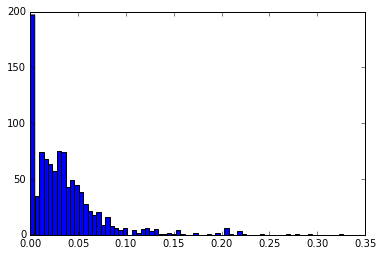

0.101361392914


In [4]:
site="rottentomatoes"
X = feat_dict[site]

X = normalize(X, norm='l1')
num_feat = len(X[0])
print "number of feats ", num_feat

K = 100
kdist_list = []
nbrs = NearestNeighbors(n_neighbors=K, algorithm="ball_tree").fit(X)
distances, indices = nbrs.kneighbors(X)
for dist in distances:
    kdist_list += dist.tolist()[4:5]


for index, value in enumerate(kdist_list):
    if value > 0.10:
        print index, value

num_bins = int(num_feat/5)
print num_bins, "num_bins"
n, bins, _ = plt.hist(kdist_list, bins=num_bins)
line1 = plt.plot(4,color="r",label="question_tf-idf")

print bins
print n
# plt.yscale('log')
plt.show()

y = np.array([np.log(x) if x > 0 else 0 for x in n])
x = np.array(bins[1:]).reshape(-1, 1)
threshold = np.mean(n[100/3:])
threshold = 4


for idx, val in enumerate(n):
    if val < threshold and idx > 5:
        eps = bins[idx]
        break
print eps

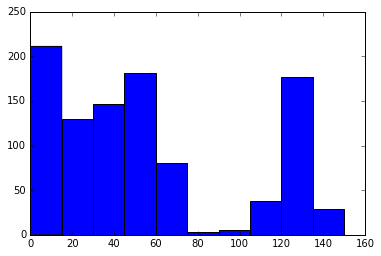

array([   0.,   15.,   30.,   45.,   60.,   75.,   90.,  105.,  120.,
        135.,  150.])

In [8]:
nbrs = NearestNeighbors(radius=eps, algorithm="ball_tree").fit(X)
distances, indices = nbrs.radius_neighbors(X, radius=eps)
nbr_num_list = []
for ind in indices:
    nbr_num_list.append(len(ind) - 1)
n, bins, _ = plt.hist(nbr_num_list, bins=10)
plt.show()
bins